In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
data.shape

(21293, 4)

In [4]:
data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [7]:
data.loc[data['Item'] == 'NONE', :].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [8]:
data = data.drop(data.loc[data['Item'] == 'NONE'].index)

In [9]:
data.loc[data['Item'] == 'NONE', :].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [10]:
data['Item'].nunique()

94

In [11]:
data['Item'].value_counts().sort_values(ascending = False).head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

Text(0.5, 1.0, 'Best sellers')

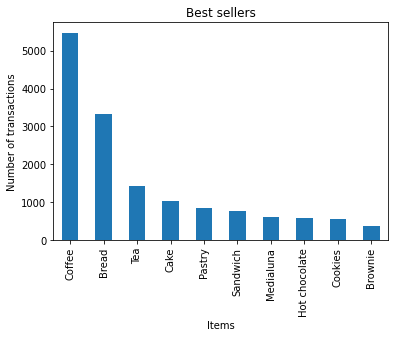

In [12]:
fig, ax = plt.subplots(figsize = (6, 4))
data['Item'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

In [13]:
data.loc[(data['Time'] < '12:00:00'), 'Daytime'] = 'Morning'
data.loc[(data['Time'] >= '12:00:00') & (data['Time'] < '17:00:00'), 'Daytime'] = 'Afternoon'
data.loc[(data['Time'] >= '17:00:00') & (data['Time'] < '21:00:00'), 'Daytime'] = 'Evening'
data.loc[(data['Time'] >= '21:00:00') & (data['Time'] < '23:50:00'), 'Daytime'] = 'Night'

Text(0.5, 1.0, 'Business during the day')

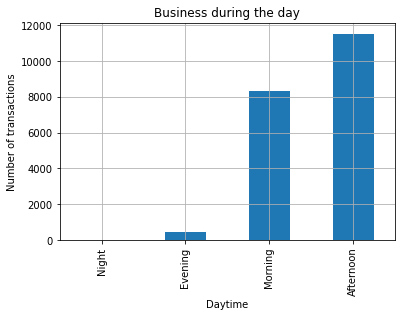

In [14]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.set_style('darkgrid')
data.groupby('Daytime')['Item'].count().sort_values().plot(kind = 'bar')
plt.ylabel('Number of transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')

In [15]:
data.groupby('Daytime')['Item'].count().sort_values(ascending = False)

Daytime
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Item, dtype: int64

In [16]:
data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Day'] = data['Date_Time'].dt.day_name()
data['Month'] = data['Date_Time'].dt.month
data['Month_name'] = data['Date_Time'].dt.month_name()
data['Year'] = data['Date_Time'].dt.year
data['Year_Month'] = data['Year'].apply(str) + ' ' + data['Month_name'].apply(str)
data.drop(['Date', 'Time'], axis = 1, inplace = True)

data.index = data['Date_Time']
data.index.name = 'Date'
data.drop(['Date_Time'], axis = 1, inplace = True)
data.head()

,Transaction,Item,Daytime,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,
2016-10-30 09:58:11,1,Bread,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Hot chocolate,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Jam,Morning,Sunday,10,October,2016,2016 October


Text(0.5, 1.0, 'Business during the past months')

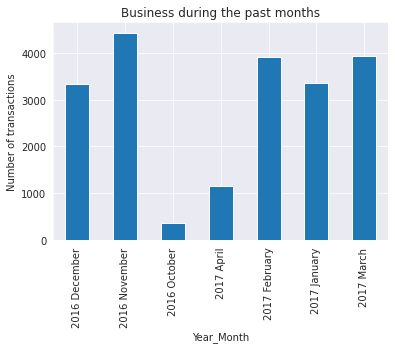

In [17]:
data.groupby('Year_Month')['Item'].count().plot(kind = 'bar')
plt.ylabel('Number of transactions')
plt.title('Business during the past months')

In [18]:
data.sort_values(by='Transaction', ascending=False)

,Transaction,Item,Daytime,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,
2017-04-09 15:04:24,9684,Smoothies,Afternoon,Sunday,4,April,2017,2017 April
2017-04-09 14:57:06,9683,Pastry,Afternoon,Sunday,4,April,2017,2017 April
2017-04-09 14:57:06,9683,Coffee,Afternoon,Sunday,4,April,2017,2017 April
2017-04-09 14:32:58,9682,Tea,Afternoon,Sunday,4,April,2017,2017 April
2017-04-09 14:32:58,9682,Coffee,Afternoon,Sunday,4,April,2017,2017 April
...,...,...,...,...,...,...,...,...
2016-10-30 10:07:57,3,Hot chocolate,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Cookies,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Sunday,10,October,2016,2016 October


In [19]:
data['Item'].value_counts().sort_values(ascending = True).head(10)

Raw bars           1
Olum & polenta     1
Polenta            1
Adjustment         1
Gift voucher       1
The BART           1
Bacon              1
Chicken sand       1
Hack the stack     2
Chimichurri Oil    2
Name: Item, dtype: int64

In [27]:
data2 = data.pivot_table(index = 'Month_name', columns = 'Item', aggfunc = {'Item': 'count'}).fillna(0)
data2['Max'] = data2.idxmax(axis = 1)
data2

Item                           ...                              Max
Item       Adjustment Afternoon with the baker  ... Victorian Sponge                
Month_name                                      ...                                 
April             0.0                      2.0  ...              0.0  (Item, Coffee)
December          0.0                      0.0  ...              0.0  (Item, Coffee)
February          0.0                     13.0  ...              0.0  (Item, Coffee)
January           0.0                     15.0  ...              0.0  (Item, Coffee)
March             0.0                     14.0  ...              0.0  (Item, Coffee)
November          1.0                      0.0  ...              4.0  (Item, Coffee)
October           0.0                      0.0  ...              3.0  (Item, Coffee)

[7 rows x 95 columns]

In [28]:
data2_1 = data.pivot_table(index = 'Month_name', columns = 'Item', aggfunc = {'Item': 'count'}).fillna(0)
data2_1['Min'] = data2_1.idxmin(axis = 1)
data3

Item  ...                               Min
Item       Adjustment  ...                                  
Month_name             ...                                  
April             0.0  ...                (Item, Adjustment)
December          0.0  ...                (Item, Adjustment)
February          0.0  ...                (Item, Adjustment)
January           0.0  ...                (Item, Adjustment)
March             0.0  ...                (Item, Adjustment)
November          1.0  ...  (Item, Afternoon with the baker)
October           0.0  ...                (Item, Adjustment)

[7 rows x 95 columns]

In [29]:
data3 = data.pivot_table(index = 'Daytime', columns = 'Item', aggfunc = {'Item': 'count'}).fillna(0)
data3['Max'] = data3.idxmax(axis = 1)
data3

Item  ...                  Max
Item      Adjustment  ...                     
Daytime               ...                     
Afternoon        0.0  ...       (Item, Coffee)
Evening          1.0  ...       (Item, Coffee)
Morning          0.0  ...       (Item, Coffee)
Night            0.0  ...  (Item, Vegan Feast)

[4 rows x 95 columns]

In [30]:
data4 = data.pivot_table(index = 'Day', columns = 'Item', aggfunc = {'Item': 'count'}).fillna(0)
data4['Max'] = data4.idxmax(axis = 1)
data4

Item                           ...                              Max
Item      Adjustment Afternoon with the baker  ... Victorian Sponge                
Day                                            ...                                 
Friday           0.0                      7.0  ...              0.0  (Item, Coffee)
Monday           0.0                      5.0  ...              0.0  (Item, Coffee)
Saturday         0.0                     12.0  ...              1.0  (Item, Coffee)
Sunday           0.0                     14.0  ...              4.0  (Item, Coffee)
Thursday         0.0                      2.0  ...              0.0  (Item, Coffee)
Tuesday          0.0                      2.0  ...              1.0  (Item, Coffee)
Wednesday        1.0                      2.0  ...              1.0  (Item, Coffee)

[7 rows x 95 columns]

Text(0.5, 1.0, 'Business during the past months')

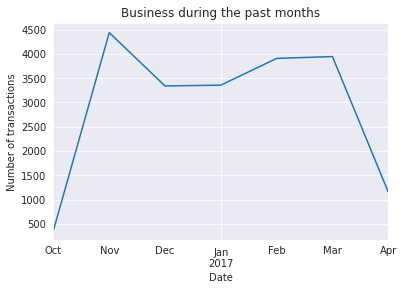

In [31]:
data['Item'].resample('M').count().plot()
plt.ylabel('Number of transactions')
plt.title('Business during the past months')

In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [33]:
lst = []
for item in data['Transaction'].unique():
  lst2 = list(set(data[data['Transaction'] == item]['Item']))
  if len(lst2) > 0 :
    lst.append(lst2)
print(lst[0 : 3])
print(len(lst))

[['Bread'], ['Scandinavian'], ['Cookies', 'Jam', 'Hot chocolate']]
9465


In [34]:
te = TransactionEncoder()
te_data = te.fit(lst).transform(lst)
data_x = pd.DataFrame(te_data, columns = te.columns_)
print(data_x.head())

frequent_items = apriori(data_x, use_colnames = True, min_support = 0.03)
print(frequent_items.head())

rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

   Adjustment  Afternoon with the baker  ...  Vegan mincepie  Victorian Sponge
0       False                     False  ...           False             False
1       False                     False  ...           False             False
2       False                     False  ...           False             False
3       False                     False  ...           False             False
4       False                     False  ...           False             False

[5 rows x 94 columns]
    support     itemsets
0  0.036344  (Alfajores)
1  0.327205      (Bread)
2  0.040042    (Brownie)
3  0.103856       (Cake)
4  0.478394     (Coffee)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
1,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
2,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
3,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
4,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
5,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
6,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807


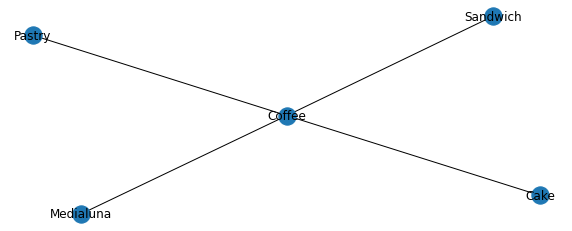

In [35]:
fig, ax = plt.subplots(figsize = (10, 4))
GA = nx.from_pandas_edgelist(rules, source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()